In [1]:
import pandas as pd
import pylab as plt
import pickle
import numpy as np
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("white")

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [3]:
#Read adata
df_ineq = pd.read_csv("./wid/Data/WID_US_InequalityData.csv",sep=";",skiprows=7)
df_macr = pd.read_csv("./wid/Data/WID_US_MacroData.csv",sep=";",skiprows=7)

Things we need:
- Labor income: pllin: pre-tax labor income [pre-tax labor income ranking] --> apllin992j
- Wealth: hweal                         net personal wealth --> ahweal992j
- Capital gains: Fraction of the return on wealth that "becomes income" --> afikgi992t
- Rate of return:
    - Dividends: fidiv  (afidiv992t) ,sfidiv999t                      dividends
    - Interests: ptint  (sfkfix992j)                     interest income
    - Housing: pthou    (sfkhou992j)                     housing asset income
    - Equity: ptfin     (sptfin992j)                    equity asset income
    - Pensions: fkpen    (sfkpen992j                     pensions and life insurance asset income
    - Capital: fkmik  (sfkmik992j)                       capital component of mixed income
- Saving rates: hsavi  (ahsavi992i)                       net personal saving

df_macr["ahsavi992i"]
df_ineq[["year","perc","apllin992j","ahweal992j","afikgi992t",
         "sfidiv999t","sfkfix992j","sfkhou992j","sptfin992j","sfkpen992j","sfkmik992j"]].groupby("perc").describe()

- Labor/wealth --> WID
- Capital gains/rate of return/saving rates --> "Yonatan"

In [4]:
#!grep fiinc wid/Data/WID_US_InequalityData.csv

In [5]:
#!grep dicot wid/Data/WID_US_InequalityData.csv
#!grep "tax" wid/Data/wid_codes.txt

## Initialization data (1962)

In [6]:
perc = ["p{}p{}".format(i,i+1) for i in range(100)]
print(perc)
init_wealth = df_ineq.loc[(df_ineq["year"]==1966)&(df_ineq["perc"].isin(perc)),["year","perc","ahweal992j"]]    
init_wealth["perc"] = init_wealth["perc"].apply(lambda x: x.split("p")[1]).astype(int)
init_wealth = init_wealth.sort_values(by="perc")
np.savetxt("data_abm/init_wealth_percentile.txt",init_wealth["ahweal992j"])

#TOREAD np.loadtxt("data_abm/init_wealth_percentile.txt")

['p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 'p5p6', 'p6p7', 'p7p8', 'p8p9', 'p9p10', 'p10p11', 'p11p12', 'p12p13', 'p13p14', 'p14p15', 'p15p16', 'p16p17', 'p17p18', 'p18p19', 'p19p20', 'p20p21', 'p21p22', 'p22p23', 'p23p24', 'p24p25', 'p25p26', 'p26p27', 'p27p28', 'p28p29', 'p29p30', 'p30p31', 'p31p32', 'p32p33', 'p33p34', 'p34p35', 'p35p36', 'p36p37', 'p37p38', 'p38p39', 'p39p40', 'p40p41', 'p41p42', 'p42p43', 'p43p44', 'p44p45', 'p45p46', 'p46p47', 'p47p48', 'p48p49', 'p49p50', 'p50p51', 'p51p52', 'p52p53', 'p53p54', 'p54p55', 'p55p56', 'p56p57', 'p57p58', 'p58p59', 'p59p60', 'p60p61', 'p61p62', 'p62p63', 'p63p64', 'p64p65', 'p65p66', 'p66p67', 'p67p68', 'p68p69', 'p69p70', 'p70p71', 'p71p72', 'p72p73', 'p73p74', 'p74p75', 'p75p76', 'p76p77', 'p77p78', 'p78p79', 'p79p80', 'p80p81', 'p81p82', 'p82p83', 'p83p84', 'p84p85', 'p85p86', 'p86p87', 'p87p88', 'p88p89', 'p89p90', 'p90p91', 'p91p92', 'p92p93', 'p93p94', 'p94p95', 'p95p96', 'p96p97', 'p97p98', 'p98p99', 'p99p100']


## Variables

In [7]:
#Income (percentile)
perc = ["p{}p{}".format(i,i+1) for i in range(100)]
print(perc)
variables = df_ineq.loc[(df_ineq["year"]>=1966)&(df_ineq["perc"].isin(perc)),["year","perc","ahweal992j","apllin992j"]]    
variables["perc"] = variables["perc"].apply(lambda x: x.split("p")[1]).astype(int)
variables = variables.sort_values(by=["year","perc"])
#np.savetxt("data_abm/init_wealth_percentile.txt",init_wealth["ahweal992j"])

year2income = dict()
year2wealth = dict()
for year,data in variables.groupby("year",sort=False):
    year2income[year] = data["apllin992j"].values
    year2wealth[year] = data["ahweal992j"].values

pickle.dump(year2income,open("data_abm/year2income.dump","wb+"))
pickle.dump(year2wealth,open("data_abm/year2wealth.dump","wb+"))

##TOREAD year2income = pickle.load(open("data_abm/year2income.dump"))
##TOREAD year2wealth = pickle.load(open("data_abm/year2income.dump"))

['p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 'p5p6', 'p6p7', 'p7p8', 'p8p9', 'p9p10', 'p10p11', 'p11p12', 'p12p13', 'p13p14', 'p14p15', 'p15p16', 'p16p17', 'p17p18', 'p18p19', 'p19p20', 'p20p21', 'p21p22', 'p22p23', 'p23p24', 'p24p25', 'p25p26', 'p26p27', 'p27p28', 'p28p29', 'p29p30', 'p30p31', 'p31p32', 'p32p33', 'p33p34', 'p34p35', 'p35p36', 'p36p37', 'p37p38', 'p38p39', 'p39p40', 'p40p41', 'p41p42', 'p42p43', 'p43p44', 'p44p45', 'p45p46', 'p46p47', 'p47p48', 'p48p49', 'p49p50', 'p50p51', 'p51p52', 'p52p53', 'p53p54', 'p54p55', 'p55p56', 'p56p57', 'p57p58', 'p58p59', 'p59p60', 'p60p61', 'p61p62', 'p62p63', 'p63p64', 'p64p65', 'p65p66', 'p66p67', 'p67p68', 'p68p69', 'p69p70', 'p70p71', 'p71p72', 'p72p73', 'p73p74', 'p74p75', 'p75p76', 'p76p77', 'p77p78', 'p78p79', 'p79p80', 'p80p81', 'p81p82', 'p82p83', 'p83p84', 'p84p85', 'p85p86', 'p86p87', 'p87p88', 'p88p89', 'p89p90', 'p90p91', 'p91p92', 'p92p93', 'p93p94', 'p94p95', 'p95p96', 'p96p97', 'p97p98', 'p98p99', 'p99p100']


In [197]:
#Saving rate and capital gains (1+q)
yonatan = pd.read_csv('data_abm/SZ_reprod_1967_2012.csv').dropna(axis=1,thresh=20)
yonatan.columns = ["year","W_90","W_10","W_1","I_90","I_10","I_1","S_90","S_10","S_1","ASR","WIR","Yt/Wt","national income","total wealth","asset price change rate","RAPE_90","RAPE_10","RAPE_1"]
yonatan = yonatan.dropna(subset=["year"])
yonatan["year"] = yonatan["year"].astype(int)
x = yonatan["national income"].values
x = np.concatenate([[np.NaN],(x[:-1]-x[1:])/x[:-1]])
yonatan["national income growth"] = x

yonatan["RCG_90"] = yonatan["RAPE_90"]*(1+yonatan["asset price change rate"])
yonatan["RCG_10"] = yonatan["RAPE_10"]*(1+yonatan["asset price change rate"])
yonatan["RCG_1"] = yonatan["RAPE_1"]*(1+yonatan["asset price change rate"])
yonatan = yonatan.loc[yonatan["year"]>=1966,["year","S_90","S_10","S_1","RCG_90","RCG_10","RCG_1","asset price change rate"]]
 
year2saving = dict()
year2capital_gains = dict()
for year,data in yonatan.groupby("year",sort=False):
    year2saving[year] = data[["S_90","S_10","S_1"]].values[0]
    year2capital_gains[year] = data[["RCG_90","RCG_10","RCG_1"]].values[0]


pickle.dump(year2saving,open("data_abm/year2saving.dump","wb+"))
pickle.dump(year2capital_gains,open("data_abm/year2capital_gains.dump","wb+"))

##TOREAD year2saving = pickle.load(open("data_abm/year2saving.dump"))
##TOREAD year2capital_gains = pickle.load(open("data_abm/year2capital_gains.dump"))

In [ ]:
##RAte of return
a = df_ineq[["year","perc","aficap992t","ahweal992j"]].dropna()
def pivot(df,values):
    a = pd.pivot_table(df, values=values, index=['year'],columns=['perc'])
    a["p90p95"] = 2*a["p90p100"] - a["p95p100"]
    a["p95p99"] = (5*a["p95p100"] - a["p99p100"])/4
    a["p99p99.5"] = (1*a["p99p100"] - a["p99.5p100"])/0.5
    a["p99.5p99.9"] = (0.5*a["p99.5p100"] - a["p99.9p100"])/0.4
    a["p99.9p99.99"] = (0.1*a["p99.9p100"] - a["p99.99p100"])/0.01
    return a


a = (pivot(a,"aficap992t")/pivot(a,"ahweal992j")).reset_index()
a = a.melt(id_vars="year",value_vars=['p90p95', 'p95p99','p99p99.5', 'p99.5p99.9', 'p99.9p99.99','p99.99p100'])
a["perc"] = a["perc"].apply(lambda x: x.split("p")[1]).astype(float)
a = a.sort_values(by="perc")
a = a.loc[a["year"]>1965]

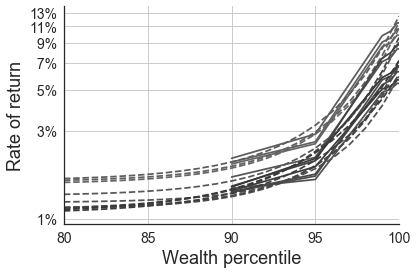

In [370]:
year2rate_return = dict()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
i = 0
for year,data in a.groupby("year"):
    i += 1
    if year < 2005:
        continue
    #data["value"] /= np.max(data["value"])
    popt, pcov = curve_fit(func, data["perc"]-95, np.log(data["value"]))
    
    y = func(np.arange(0,101)-95,*popt)
    
    plt.plot(data["perc"],data["value"],"-",color=((60-i)/50,(60-i)/50,(60-i)/50))
    plt.plot(np.arange(0,101),np.exp(y),"--",color=((60-i)/50,(60-i)/50,(60-i)/50))
    
    year2rate_return[year] = np.exp(y)

    
plt.yscale("log")
plt.xlim(80,100)


pickle.dump(year2rate_return,open("data_abm/year2rate_return.dump","wb+"))

plt.xlabel("Wealth percentile",fontsize=18)
plt.ylabel("Rate of return",fontsize=18)
plt.yticks(np.linspace(0.01,0.13,7),["{:2.0f}%".format(_) for _ in np.linspace(1,13,7)])
plt.grid("on")


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.savefig("figures/rate_return.pdf")
plt.show()

       perc    ahweal992j
105  75.000  2.209083e+02
120  90.000  5.876015e+02
16   99.000  6.519498e+03
17   99.900  3.504856e+04
18   99.990  1.984098e+05
19   99.999  1.511612e+06
    perc  ahweal992j
80  50.0   49.583704


9.212876997398737

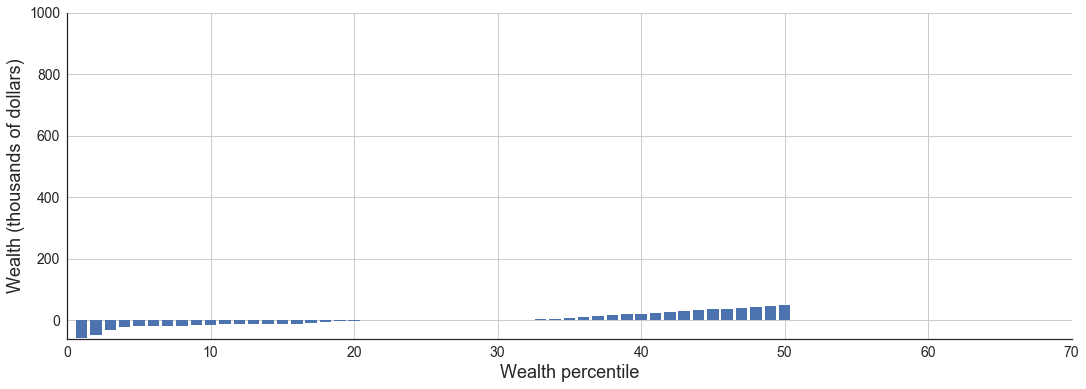

In [441]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
w2015 = df_ineq.loc[df_ineq["year"]==2014,["perc","ahweal992j"]]
keep_perc = ["p{}p{}".format(i,i+1) for i in range(1,100)] + ["p99.9p100","p99.99p100","p99.999p100"]
w2015 = w2015.loc[w2015["perc"].isin(keep_perc)]
p99p100 = w2015.loc[w2015["perc"]=="p99p100","ahweal992j"].values[0]
p99_9p100 = w2015.loc[w2015["perc"]=="p99.9p100","ahweal992j"].values[0]
p99_99p100 = w2015.loc[w2015["perc"]=="p99.99p100","ahweal992j"].values[0]
p99_999p100 = w2015.loc[w2015["perc"]=="p99.999p100","ahweal992j"].values[0]

w2015.loc[w2015["perc"]=="p99p100","ahweal992j"] = 1.1*p99p100 - 0.1*p99_9p100
w2015.loc[w2015["perc"]=="p99.9p100","ahweal992j"] = 1.1*p99_9p100 - 0.1*p99_99p100
w2015.loc[w2015["perc"]=="p99.99p100","ahweal992j"] = 1.1*p99_99p100 - 0.1*p99_999p100

w2015["perc"] = w2015["perc"].apply(lambda x: x.split("p")[1]).astype(float)
w2015 = w2015.sort_values(by="perc")
w2015["ahweal992j"] = w2015["ahweal992j"]/1000
print(w2015.loc[w2015["perc"].isin([75,90,99,99.9,99.99,99.999])])
w2015 = w2015.loc[w2015["perc"]<=50]
x = w2015["perc"].values
y = w2015["ahweal992j"].values
plt.bar(x,y)
plt.ylim(-1E2,1E2)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel("Wealth percentile",fontsize=18)
plt.ylabel("Wealth (thousands of dollars)",fontsize=18)
plt.grid("on")
plt.ylim(-60,1000)
plt.xlim(0,70)
print(w2015.tail(1))

##TOOD
# - Evolution of wealth for the top 0.1% or something like that
plt.savefig("./figures/inequality.pdf")

49.583704/5.382

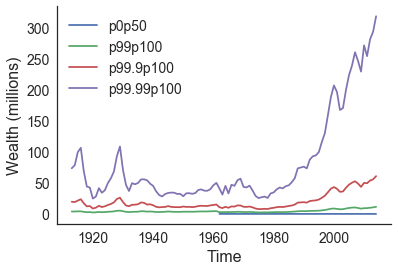

In [472]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for p in ["p0p50","p99p100","p99.9p100","p99.99p100"]:
    a = df_ineq.loc[df_ineq["perc"]==p,["year","ahweal992j"]].dropna().sort_values(by="year")
    #a.loc[a["ahweal992j"]<0,"ahweal992j"] = 100
    plt.plot(a["year"],a["ahweal992j"]/1E6,label=p)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel("Time",fontsize=16)
plt.ylabel("Wealth (millions)",fontsize=16)
plt.legend()
plt.savefig("./figures/wealth_evolution.pdf")

In [174]:
df = pd.read_csv("./wid/Data/WID_US_InequalityData.csv",sep=";",skiprows=7)

#t threshold, a average, b invert pareto coefficient, s share
#tptinc992j: pre-tax national income, every adult
#tdiinc992j: post-tax national income, every adult
#cainc

national_income = df[["year","perc","aptinc992j","adiinc992j"]]
national_income["tax_rate"] = 100*(national_income["aptinc992j"] - national_income["adiinc992j"])/national_income["aptinc992j"]
keep_perc = ["p{}p{}".format(i,i+1) for i in range(1,100)]
national_income = national_income.loc[national_income["perc"].isin(keep_perc)]

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [175]:
national_income.loc[national_income["year"]==2010]

,year,perc,aptinc992j,adiinc992j,tax_rate
1108,2010,p99p100,1.248235e+06,1.004640e+06,19.515147
1123,2010,p1p2,-1.890827e+03,6.305262e+02,133.346582
1124,2010,p2p3,-5.673984e+02,3.782405e+03,766.622526
1125,2010,p3p4,0.000000e+00,6.241382e+03,-inf
1126,2010,p4p5,8.191579e+02,8.132209e+03,-892.752307
1127,2010,p5p6,2.206466e+03,9.582645e+03,-334.298371
1128,2010,p6p7,3.404390e+03,1.090607e+04,-220.353205
1129,2010,p7p8,4.476059e+03,1.185186e+04,-164.783415
1130,2010,p8p9,5.421473e+03,1.298704e+04,-139.548104
1131,2010,p9p10,6.304134e+03,1.405833e+04,-123.001732


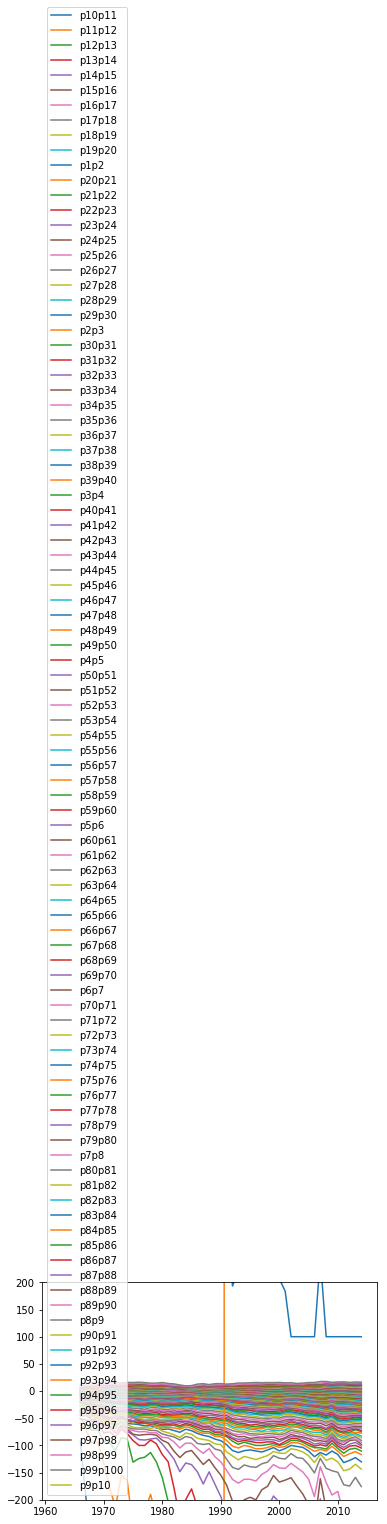

In [32]:
for p,data in national_income.groupby("perc"):
    x = data.groupby("year").mean().reset_index()
    plt.plot(x["year"],x["tax_rate"],label=p)
    #sns.pointplot(x="year",y="tptinc992j",hue="perc",data=national_income)
plt.ylim(-200,200)
plt.legend()
